## Data analysis

### In this exercise, you are goining to experience how to use pandas to analyse the results of a crowdsourcing expriement.

#### FigureEight is a crowdsourcing website where you can hire people to do task that takes a long time and labour. In this case Figure Eight was used to ask the crowd to label a set of tweets as related to protest events or not and if  these tweets report violent incidents. 

#### This exercise asks you to do basic tasks on the crowdsourcing data to clean it, visulaize it and make it ready to be used further in the Data science process.

**Step 1: import the data from csv file CF_full_report_20_05_2018.csv and explore it by showing:**
* Print the first 5 records 
* Shape
* Columns'names
  

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize

In [34]:
df_CF_all = pd.read_csv("../Data/CF_full_report_20_05_2018.csv",encoding = "ISO-8859-1")

In [35]:
#Print the first 5 records 
df_CF_all.head(5)

,_unit_id,_created_at,_golden,_id,_missed,_started_at,_tainted,_channel,_trust,_worker_id,...,_city,_ip,does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest,is_this_tweet_related_to_turkish_protests_2013,created_at,does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest_gold,id,is_this_tweet_related_to_turkish_protests_2013_gold,proccd_text,text
0,1657977620,3/30/2018 15:04:23,True,3525070669,NaN,3/30/2018 15:02:15,False,clixsense,1.000,42468422,...,Ankara,176.88.19.7,NaN,0,Sat Jun 08 18:45:54 +0000 2013,NaN,3.434390e+17,0.0,NaN,Princes Island Tour from Istanbul http://t.co/...
1,1657977620,3/30/2018 15:12:35,True,3525098270,NaN,3/30/2018 15:07:33,True,clixsense,1.000,42739585,...,Tekirdag,94.120.163.34,NaN,0,Sat Jun 08 18:45:54 +0000 2013,NaN,3.434390e+17,0.0,NaN,Princes Island Tour from Istanbul http://t.co/...
2,1657977620,3/30/2018 15:13:03,True,3525099825,NaN,3/30/2018 15:10:58,False,clixsense,0.976,44042396,...,Ìàorum,78.163.26.195,NaN,0,Sat Jun 08 18:45:54 +0000 2013,NaN,3.434390e+17,0.0,NaN,Princes Island Tour from Istanbul http://t.co/...
3,1657977620,04/03/18 16:27,True,3535776439,NaN,04/03/18 16:25,False,clixsense,0.960,44118241,...,Kahramanmaras,78.185.110.209,NaN,0,Sat Jun 08 18:45:54 +0000 2013,NaN,3.434390e+17,0.0,NaN,Princes Island Tour from Istanbul http://t.co/...
4,1657977620,04/03/18 18:22,True,3536059399,NaN,04/03/18 18:20,True,clixsense,1.000,40031413,...,NaN,78.176.71.46,NaN,0,Sat Jun 08 18:45:54 +0000 2013,NaN,3.434390e+17,0.0,NaN,Princes Island Tour from Istanbul http://t.co/...


In [36]:
df_CF_all.shape

(5915, 22)

In [37]:
df_CF_all.columns

Index(['_unit_id', '_created_at', '_golden', '_id', '_missed', '_started_at',
       '_tainted', '_channel', '_trust', '_worker_id', '_country', '_region',
       '_city', '_ip',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest',
       'is_this_tweet_related_to_turkish_protests_2013', 'created_at',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest_gold',
       'id', 'is_this_tweet_related_to_turkish_protests_2013_gold',
       'proccd_text', 'text'],
      dtype='object')

**As you can see the column names are long and not so meaningful. So we will start with renameing the columns:
'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest':'violence'
'is_this_tweet_related_to_turkish_protests_2013' : 'protest'**

To rename columns in a dataframe use rename() function along with dictionary

In [38]:
column_names = {'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest':'violence',
                         'is_this_tweet_related_to_turkish_protests_2013' : 'protest'}

In [39]:
df_CF_all.rename(columns=column_names, inplace =True)

**When you use crowdsourcing data, you provide the users with test questions which are sample of labeled data to test the user's accuracy. These data are under the column '_golden'**

Extract all the test questions and save them in a dataframe called df_CF_all_test_questions

In [40]:
df_CF_all_test_questions = df_CF_all[df_CF_all['_golden'] == True]

**Print the length of the test question set we have**

In [41]:
len(df_CF_all_test_questions)

1754

**There are duplications in the test question set because they are labeled several times as all the users have to do some of them. Find the number of unique test questions**

In [42]:
df_CF_all_test_questions_grp_by_text = df_CF_all_test_questions.groupby('text')
len(df_CF_all_test_questions_grp_by_text)

117

**Now print the head records of the uniques test questions**

In [43]:
df_CF_all_test_questions_grp_by_text.head()

,_unit_id,_created_at,_golden,_id,_missed,_started_at,_tainted,_channel,_trust,_worker_id,...,_city,_ip,violence,protest,created_at,does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest_gold,id,is_this_tweet_related_to_turkish_protests_2013_gold,proccd_text,text
0,1657977620,3/30/2018 15:04:23,True,3525070669,NaN,3/30/2018 15:02:15,False,clixsense,1.0000,42468422,...,Ankara,176.88.19.7,NaN,0,Sat Jun 08 18:45:54 +0000 2013,NaN,3.434390e+17,0.0,NaN,Princes Island Tour from Istanbul http://t.co/...
1,1657977620,3/30/2018 15:12:35,True,3525098270,NaN,3/30/2018 15:07:33,True,clixsense,1.0000,42739585,...,Tekirdag,94.120.163.34,NaN,0,Sat Jun 08 18:45:54 +0000 2013,NaN,3.434390e+17,0.0,NaN,Princes Island Tour from Istanbul http://t.co/...
2,1657977620,3/30/2018 15:13:03,True,3525099825,NaN,3/30/2018 15:10:58,False,clixsense,0.9760,44042396,...,Ìàorum,78.163.26.195,NaN,0,Sat Jun 08 18:45:54 +0000 2013,NaN,3.434390e+17,0.0,NaN,Princes Island Tour from Istanbul http://t.co/...
3,1657977620,04/03/18 16:27,True,3535776439,NaN,04/03/18 16:25,False,clixsense,0.9600,44118241,...,Kahramanmaras,78.185.110.209,NaN,0,Sat Jun 08 18:45:54 +0000 2013,NaN,3.434390e+17,0.0,NaN,Princes Island Tour from Istanbul http://t.co/...
4,1657977620,04/03/18 18:22,True,3536059399,NaN,04/03/18 18:20,True,clixsense,1.0000,40031413,...,NaN,78.176.71.46,NaN,0,Sat Jun 08 18:45:54 +0000 2013,NaN,3.434390e+17,0.0,NaN,Princes Island Tour from Istanbul http://t.co/...
13,1657977621,3/30/2018 14:34:34,True,3524960624,NaN,3/30/2018 14:30:22,True,clixsense,1.0000,44011955,...,Istanbul,195.142.118.5,NaN,0,Fri Jun 07 16:20:48 +0000 2013,NaN,3.430400e+17,0.0,NaN,RT @StefanFuleEU: Disappointed by the lost opp...
14,1657977621,3/30/2018 14:43:49,True,3524996460,NaN,3/30/2018 14:41:00,True,clixsense,1.0000,42584365,...,Kocaeli,95.10.201.49,NaN,0,Fri Jun 07 16:20:48 +0000 2013,NaN,3.430400e+17,0.0,NaN,RT @StefanFuleEU: Disappointed by the lost opp...
15,1657977621,3/30/2018 14:54:01,True,3525032719,NaN,3/30/2018 14:32:12,True,clixsense,0.6000,43638234,...,Istanbul,212.253.64.45,NaN,0,Fri Jun 07 16:20:48 +0000 2013,NaN,3.430400e+17,0.0,NaN,RT @StefanFuleEU: Disappointed by the lost opp...
16,1657977621,3/30/2018 15:06:53,True,3525078767,NaN,3/30/2018 15:04:49,False,clixsense,0.9600,44118241,...,Kahramanmaras,85.103.219.25,NaN,0,Fri Jun 07 16:20:48 +0000 2013,NaN,3.430400e+17,0.0,NaN,RT @StefanFuleEU: Disappointed by the lost opp...
17,1657977621,3/30/2018 15:21:39,True,3525128725,NaN,3/30/2018 15:19:35,False,clixsense,0.9760,44042396,...,Ìàorum,78.163.26.195,NaN,0,Fri Jun 07 16:20:48 +0000 2013,NaN,3.430400e+17,0.0,NaN,RT @StefanFuleEU: Disappointed by the lost opp...


** As you can see ther are alot of columns and it makes it less readable. extract only text, _worker_id and _trust**

In [44]:
df_CF_all_test_questions_grp_by_text = df_CF_all_test_questions_grp_by_text[['text','_worker_id', '_trust']]

**Now we want to show the avergae performance score of each of  workers on each of test questions, the min score and the max score**

In [49]:
text, avg_user_trust, min_user_trust, max_user_trust = [],[],[],[]

for title, group in df_CF_all_test_questions_grp_by_text:
    avg_trust = group['_trust'].aggregate(np.mean)
    min_trust = group['_trust'].aggregate(np.min)
    max_trust = group['_trust'].aggregate(np.max)
    text.append(title)
    avg_user_trust.append(avg_trust)
    min_user_trust.append(min_trust)
    max_user_trust.append(max_trust)

**create a new dataframe from the values in text, avg_user_trust, min_user_trust, max_user_trust**


In [46]:
df_CF_grouped_txt_test_question_user_trust =  pd.DataFrame({'text':text, 'avg_user_trust':avg_user_trust,
                                                    'min_user_trust':min_user_trust,
                                                    "max_user_trust":max_user_trust})

In [50]:
df_CF_grouped_txt_test_question_user_trust.head()

,avg_user_trust,max_user_trust,min_user_trust,text
0,0.992747,1.0,0.9487,"""As It Fights in #Syria #Hezbollah Seen Unfav..."
1,0.989617,1.0,0.9474,"""Turkey's premier lashes out markets fall"" ht..."
2,0.994000,1.0,0.9600,#Turkey gives direct investment to #Somalia; c...
3,0.984560,1.0,0.8571,#TurkeyNeedsWWAT Please come to Turkey!! @oned...
4,0.981140,1.0,0.8571,#direngezipark Istanbul United https://t.co/RA...


**plot a histogram for the average score of workers'trust on the test questions**

Text(0.5,1,'test questions grouped by the text')

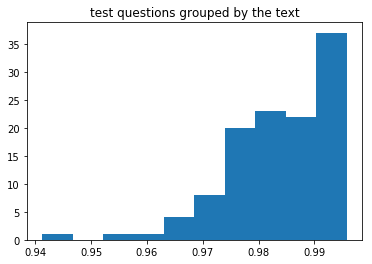

In [52]:
plt.hist(df_CF_grouped_txt_test_question_user_trust.avg_user_trust)
plt.title('test questions grouped by the text')

**Now lets work on the actual data. Select all the data that are not test questions**

In [53]:
df_CF_all_data= df_CF_all[df_CF_all['_golden'] == False]

**plot the histogram of violence againt non violence tweets.**

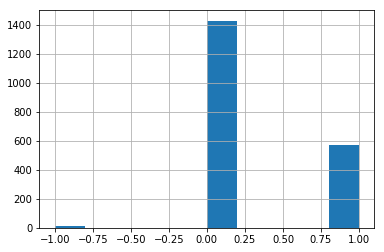

In [71]:
df_CF_all_data['violence'].hist()

**plot the histogram of protest againt non protest tweets.**

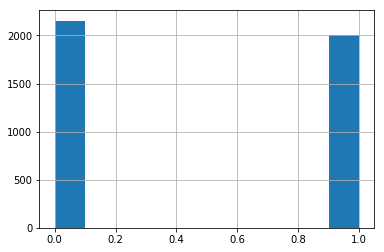

In [72]:
df_CF_all_data['protest'].hist()

**As yu can see the number of violence tweets are fewer than the non violence tweets, however, it isnot the case for protest vs non_protest. Let's try to investigate this further by finding the most occuring words in each of violence and non violence tweets and same for protest and non protest tweets**

** let's start with Create two subsets of the tweets that are labeled as protest tweets and non protest. Print how many tweets there are in each subset**

In [54]:
df_CF_protest = df_CF_all_data[df_CF_all_data['protest'] == 1]
len(df_CF_protest)

2008

In [56]:
df_CF_non_protest = df_CF_all_data[df_CF_all_data['protest'] == 0]
len(df_CF_non_protest)

2153

**repeat the previous step for violence tweets**

In [59]:
df_CF_violence = df_CF_all_data[df_CF_all_data['violence'] == 1]
len(df_CF_violence)

568

In [60]:
df_CF_non_violence = df_CF_all_data[df_CF_all_data['violence'] == 0]
len(df_CF_non_violence)

1428

**Here is a function used to find hte most frequent words in a list**

In [73]:
def word_frequencies(word_list):
    freq={}

    for word in word_list:
        count=freq.get(word,0)
        freq[word]=count + 1

    frequency_list  = freq.keys()    

    results = []
    for word in frequency_list:
        tuple = (word, freq[word])
        results.append(tuple)

    byFreq=sorted(results, key=lambda word: word[1], reverse=True)


    words_names=[]
    words_count=[]
    for (word, freq) in byFreq[:10]:
        print (word, freq)
        words_names.append(word)
        words_count.append(freq)
    return words_names, words_count  

** To be able to use word_frequencies on the text we need to apply a function called tokenize (a function that convert one string of text to a list of words)  to the text column in each of the subsets we created in the previous step and add them to new variables**

hint: The function is ready to use called word_tokenize (string)

In [85]:
violence_wordslist = df_CF_violence['text'].apply(lambda x:word_tokenize(x) )

In [88]:
non_violence_wordslist = df_CF_non_violence['text'].apply(lambda x:word_tokenize(x) )

In [89]:
protest_wordslist = df_CF_violence['text'].apply(lambda x:word_tokenize(x) )

In [91]:
non_protest_wordslist = df_CF_non_protest['text'].apply(lambda x:word_tokenize(x) )

**To be able to visualize these word lsits, you need to do something called flatten lists. When you have a list of lists into one list. the cose is written for you**

In [92]:
violence_wordslist = [item for items in violence_wordslist for item in items] #flatten the list of lists into one list
non_violence_wordslist = [item for items in non_violence_wordslist for item in items] #flatten the list of lists into one list
protest_wordslist = [item for items in protest_wordslist for item in items] #flatten the list of lists into one list
non_protest_wordslist = [item for items in non_protest_wordslist for item in items] #flatten the list of lists into one list

**Now apply the word frquency function to the the output of the flattening step. Then plot the output**

: 1069
# 868
@ 792
, 497
RT 459
http 425
. 337
in 331
the 237
Turkey 214


Text(0.5,1,'violence_wordslist')

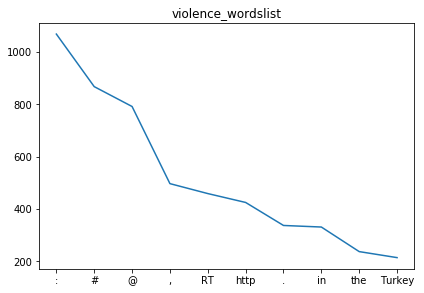

In [93]:
word, freq = word_frequencies(violence_wordslist)
plt.plot(word,freq)
plt.tight_layout()
plt.title('violence_wordslist')

: 2540
# 2269
@ 1589
http 1070
RT 1032
, 800
. 708
the 592
in 551
to 476


Text(0.5,1,'non_violence_wordslist')

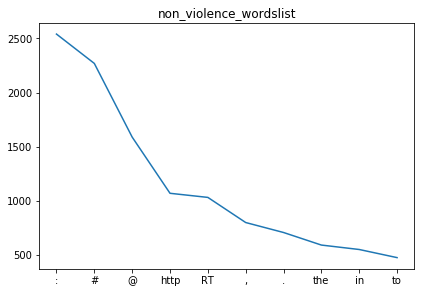

In [95]:
word, freq = word_frequencies(non_violence_wordslist)
plt.plot(word,freq)
plt.tight_layout()
plt.title('non_violence_wordslist')

: 1069
# 868
@ 792
, 497
RT 459
http 425
. 337
in 331
the 237
Turkey 214


Text(0.5,1,'protest_wordslist')

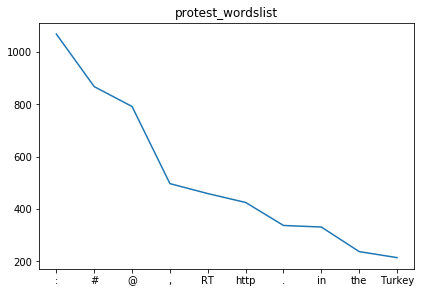

In [96]:
word, freq = word_frequencies(protest_wordslist)
plt.plot(word,freq)
plt.tight_layout()
plt.title('protest_wordslist')

: 2767
@ 1844
# 1427
http 1161
, 1067
Turkey 1025
. 1022
RT 966
in 869
the 681


Text(0.5,1,'non_protest_wordslist')

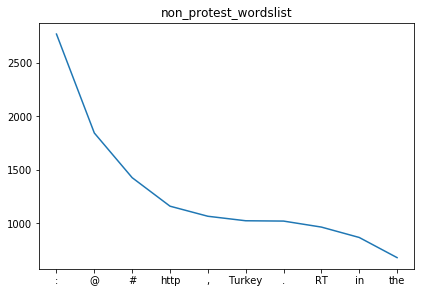

In [97]:
word, freq = word_frequencies(non_protest_wordslist)
plt.plot(word,freq)
plt.tight_layout()
plt.title('non_protest_wordslist')